In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/Downloads/All_Team_manufucture.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning) 
import spacy
import nltk
import re
import string
import pandas as pd
import numpy as np
#from stop_word_list import *
#from clean_text import *
import gensim
from gensim import corpora
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import json
%matplotlib inline

from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.wordnet import WordNetLemmatizer
from gensim import corpora, models
import pandas as pd
import gensim
import pyLDAvis.gensim

ModuleNotFoundError: No module named 'spacy'

In [3]:
df = pd.read_csv(r'../input/team-3-data-twitter/Team3_alldata.csv')

In [4]:
df.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username,verified,location,Replycount,retweetCount,likeCount,quoteCount,hashtags,cashtags
0,0,2021-10-08 08:18:47+00:00,1446389597295026179,"Yesterday, we shared interim results from our ...",Bicycle_tx,False,"Cambridge, England",0,3,9,2,"['Bicycle', 'BTCs']",NaN
1,1,2021-10-07 17:00:43+00:00,1446158557821423647,We’re excited to provide a clinical update on ...,Bicycle_tx,False,"Cambridge, England",0,1,10,3,"['Bicycle', 'BTCs', 'conference']",NaN
2,2,2021-09-30 11:03:42+00:00,1443531998144909313,"We are pleased to announce our COO, Michael Sk...",Bicycle_tx,False,"Cambridge, England",0,0,2,0,['conference'],NaN
3,3,2021-09-29 09:38:34+00:00,1443148183673229315,Open position: Medical Director (UK or US). Ap...,Bicycle_tx,False,"Cambridge, England",0,2,0,0,"['TeamBicycle', 'JoinUs', 'WeAreHiring', 'Bicy...",NaN
4,4,2021-09-28 10:05:42+00:00,1442792625703165953,Open position: Head of IP. Applications close ...,Bicycle_tx,False,"Cambridge, England",0,1,0,0,"['TeamBicycle', 'JoinUs', 'Recruitment', 'IP',...",NaN


In [5]:
df.shape

(147440, 13)

In [6]:
df.columns

Index(['Unnamed: 0', 'Datetime', 'Tweet Id', 'Text', 'Username', 'verified',
       'location', 'Replycount', 'retweetCount', 'likeCount', 'quoteCount',
       'hashtags', 'cashtags'],
      dtype='object')

In [7]:
reviews = pd.DataFrame(df.Text)

In [8]:
pattern = r'\b[^\d\W]+\b'
tokenizer = RegexpTokenizer(pattern)
en_stop = get_stop_words('en')
lemmatizer = WordNetLemmatizer()
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
import nltk 
import string 
from nltk.corpus import stopwords
stopwords_json = pd.read_json(r"https://raw.githubusercontent.com/6/stopwords-json/master/dist/en.json" )
stopwords_json.columns = ["en"]
x = stopwords.words("english")
stopwords_json_en = set(stopwords_json['en'])
stopwords_nltk_en = set(x)
stoplist_combined = set.union(stopwords_json_en, stopwords_nltk_en)
import re
from tqdm import tqdm
from bs4 import BeautifulSoup
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    #phrase = re.sub(r"re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    #phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"de", " ", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    #phrase = re.sub(r'==.*?==+', ' ', phrase)
    #phrase = re.sub(r'\n', ' ',phrase)
    return phrase

def cleanup_text(msg):
    No_Punctuation = [char for char in msg if char not in string.punctuation]
    sentance = ''.join(No_Punctuation) #joins all the strings
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    #sentance = nltk.word_tokenize(sentance)
    #sentance = nltk.word_tokenize(sentence)
    #lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in sentance])
    #return [word.lower() for word in sentance.split() if word.lower() not in stoplist_combined]
    return sentance

<>:46: DeprecationWarning: invalid escape sequence \S
<>:46: DeprecationWarning: invalid escape sequence \S
<>:46: DeprecationWarning: invalid escape sequence \S
/tmp/ipykernel_20/609882818.py:46: DeprecationWarning: invalid escape sequence \S
  sentance = re.sub("\S*\d\S*", "", sentance).strip()


In [9]:
df['Text'] = df['Text'].apply(cleanup_text)

In [10]:
clean_reviews = pd.DataFrame(df.Text)

In [11]:
clean_reviews

,Text
0,Yesterday we shared interim results from our P...
1,We re excited to provi a clinical update on ou...
2,We are pleased to announce our COO Michael Sky...
3,Open position Medical Director UK or US Applic...
4,Open position Head of IP Applications close Oc...
...,...
147435,Fraudsters are using the rise in personnotpres...
147436,Banks are a big target for fraudsters using da...
147437,This is what s happening to businesses and ban...
147438,A global payments provi r thats one of the lar...


In [12]:
text = " ".join(review for review in df.Text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 23044990 words in the combination of all review.


In [13]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [14]:
df.Text

0         Yesterday shared interim results Phase I clini...
1         We excited provi clinical update whollyowned B...
2         We pleased announce COO Michael Skynner partic...
3         Open position Medical Director UK US Applicati...
4         Open position Head IP Applications close Octob...
                                ...                        
147435    Fraudsters using rise personnotpresent transac...
147436    Banks big target fraudsters using data ntity t...
147437    This happening businesses banks across US carr...
147438    A global payments provi r thats one largest cr...
147439    Big Biz looks fraud coronavirus importance ID ...
Name: Text, Length: 147440, dtype: object

In [15]:
text = " ".join(review for review in df.Text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 18056712 words in the combination of all review.


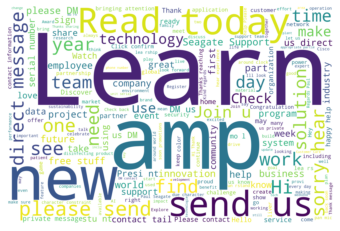

In [16]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Generate a word cloud image
wordcloud = WordCloud( width= 3000, height = 2000, random_state=1,background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


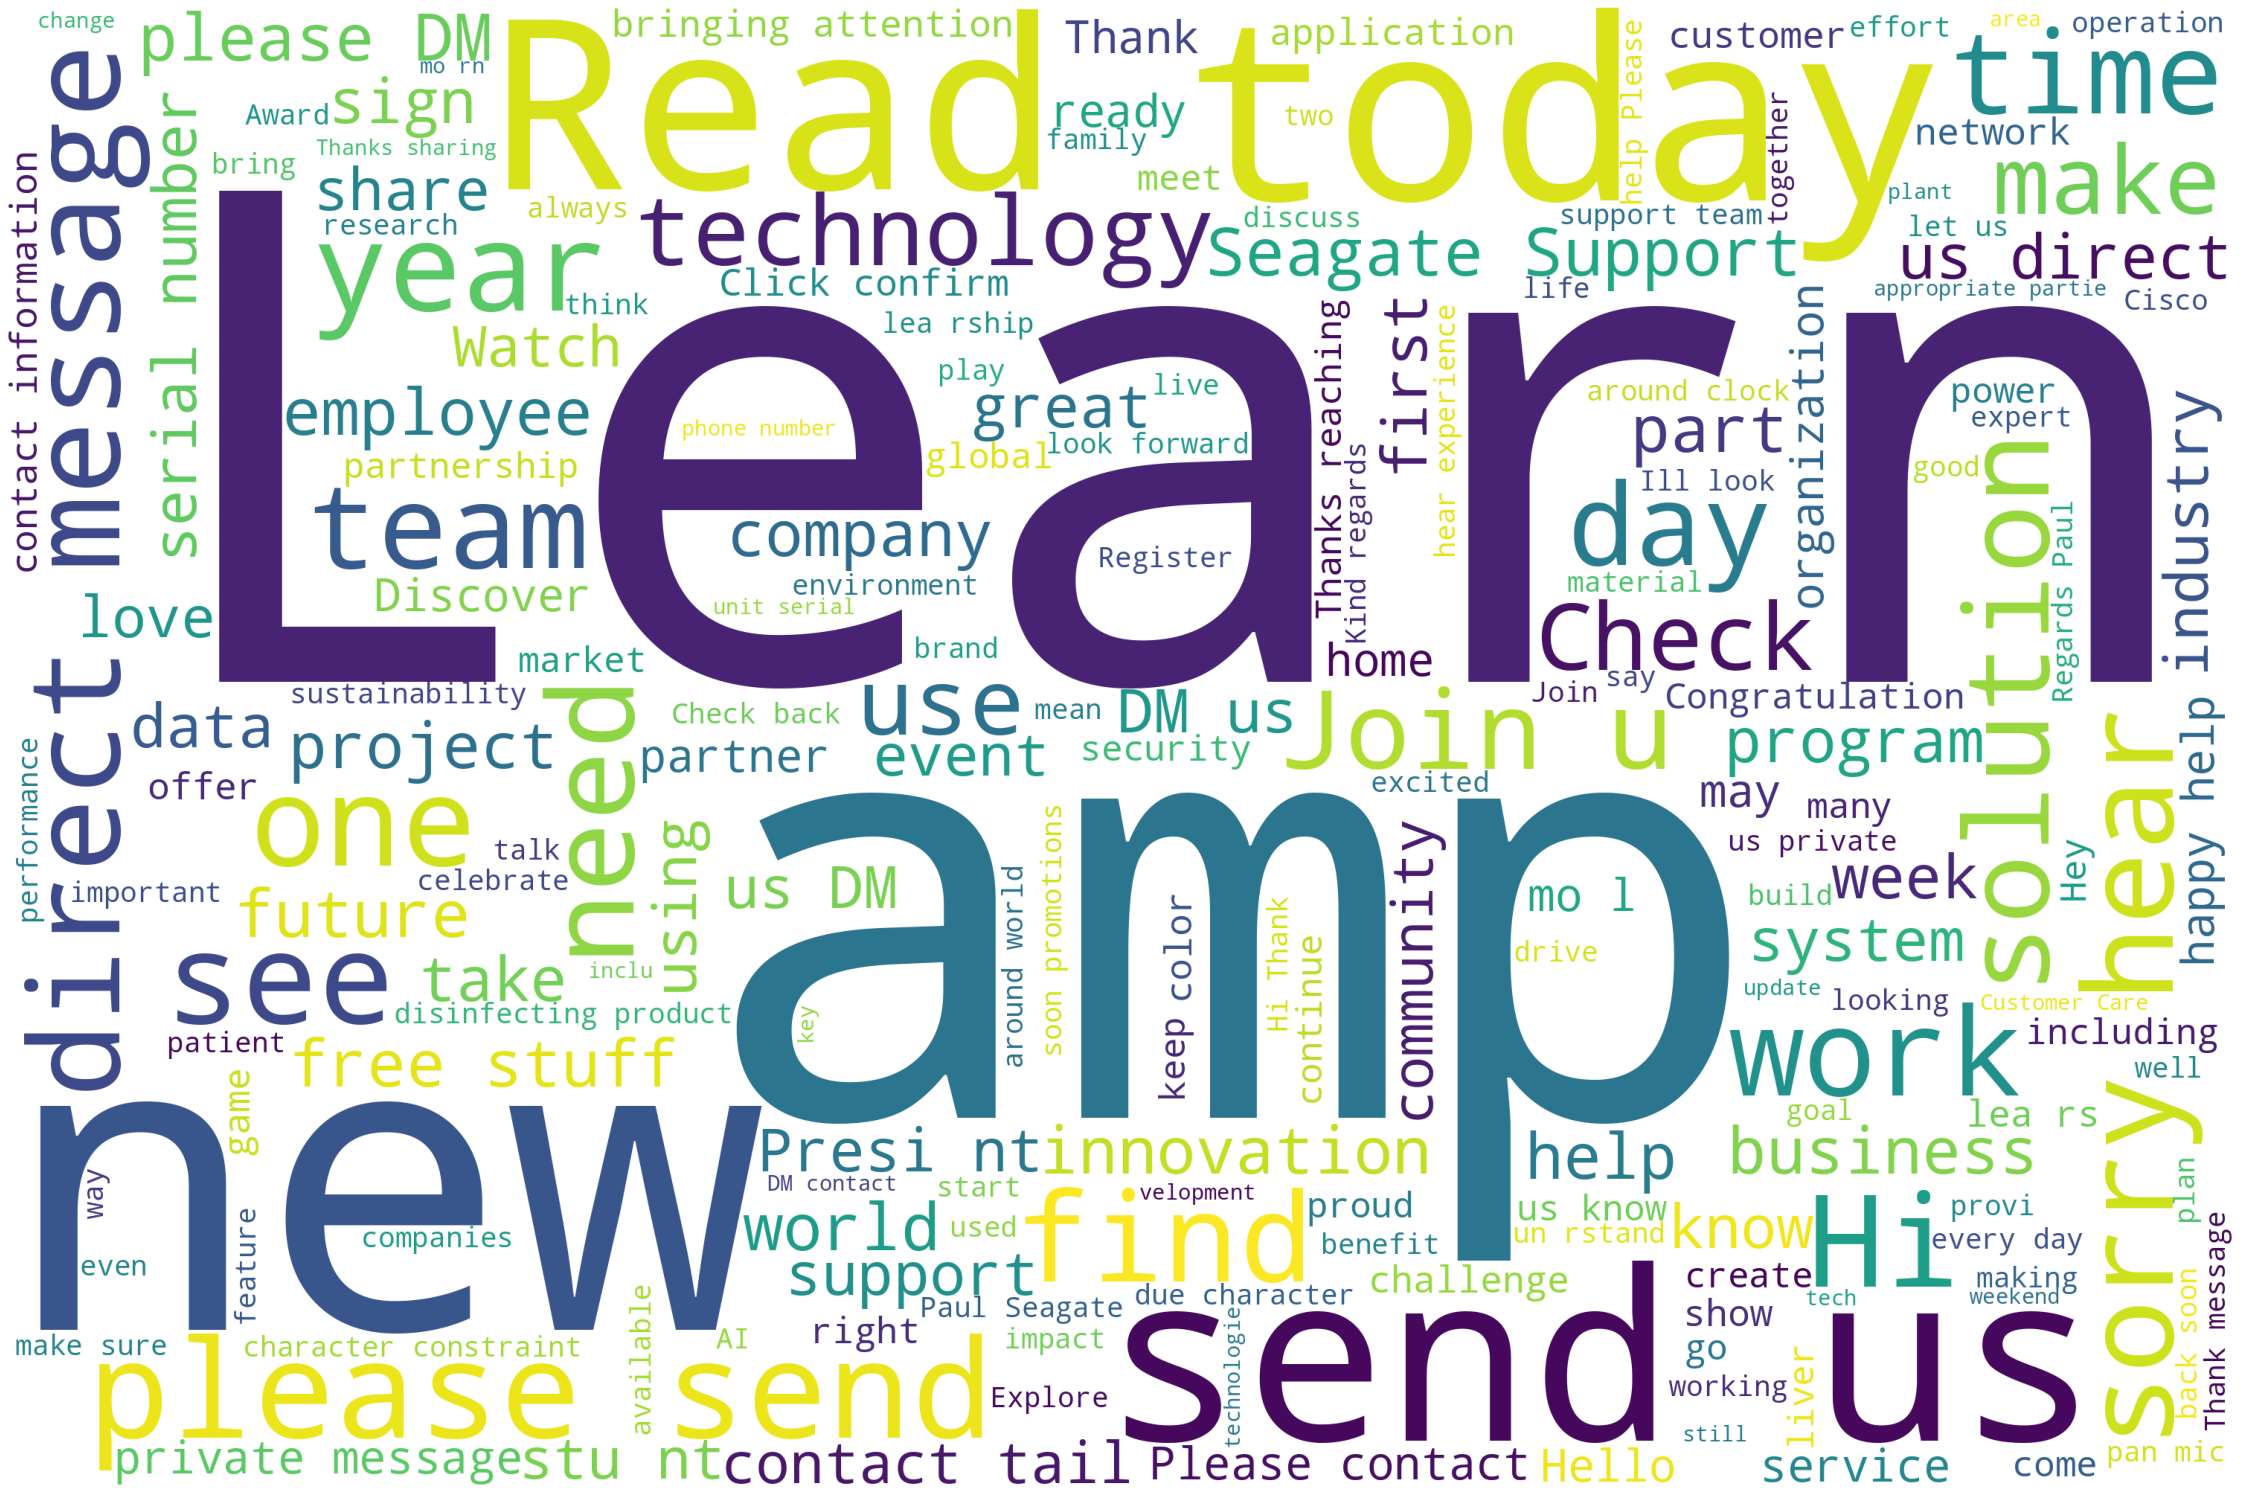

In [17]:
import matplotlib.pyplot as plt
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
    
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='white',  stopwords = STOPWORDS).generate(text)
# Plot
plot_cloud(wordcloud)

In [18]:
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

In [19]:
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

In [20]:
import plotly.graph_objs as go
from collections import defaultdict
freq_dict = defaultdict(int)
for sent in clean_reviews["Text"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'red')

In [21]:
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of in tweets"])
fig.append_trace(trace0, 1, 1)
fig['layout'].update(height=600, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

/opt/conda/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead

/opt/conda/lib/python3.7/site-packages/plotly/basedatatypes.py:2312: DeprecationWarning:

The append_trace method is deprecated and will be removed in a future version.
Please use the add_trace method with the row and col parameters.




In [22]:
freq_dict = defaultdict(int)
for sent in clean_reviews["Text"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'gray')

fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,horizontal_spacing=0.25,
                          subplot_titles=["Bigram plots of tweets"
                                          ])
fig.append_trace(trace0, 1, 1)


fig['layout'].update(height=1000, width=800, paper_bgcolor='rgb(233,233,233)', title="Bigram Plot")
iplot(fig, filename='word-plots')


/opt/conda/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead

/opt/conda/lib/python3.7/site-packages/plotly/basedatatypes.py:2312: DeprecationWarning:

The append_trace method is deprecated and will be removed in a future version.
Please use the add_trace method with the row and col parameters.




In [23]:
for sent in clean_reviews["Text"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'blue')

fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04, horizontal_spacing=0.05,
                          subplot_titles=["Tri-gram plots in tweets", 
                                          ])
fig.append_trace(trace0, 1, 1)

fig['layout'].update(height=800, width=700, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plot")
iplot(fig, filename='word-plots')

/opt/conda/lib/python3.7/site-packages/plotly/basedatatypes.py:2312: DeprecationWarning:

The append_trace method is deprecated and will be removed in a future version.
Please use the add_trace method with the row and col parameters.




In [24]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = nltk.collocations.BigramCollocationFinder.from_documents([comment.split() for comment in df.Text])
# Filter only those that occur at least 50 times
finder.apply_freq_filter(50)
bigram_scores = finder.score_ngrams(bigram_measures.pmi)

bigram_pmi = pd.DataFrame(bigram_scores)
bigram_pmi.columns = ['bigram', 'pmi']
bigram_pmi.sort_values(by='pmi', axis = 0, ascending = False, inplace = True)


def bigram_filter(bigram):
    tag = nltk.pos_tag(bigram)
    if tag[0][1] not in ['JJ', 'NN'] and tag[1][1] not in ['NN']:
        return False
    if bigram[0] in stop or bigram[1] in stop:
        return False
    if 'n' in bigram or 't' in bigram:
        return False
    if 'PRON' in bigram:
        return False
    return True

In [25]:
filtered_bigram = bigram_pmi[bigram_pmi.apply(lambda bigram:\
                                              bigram_filter(bigram['bigram'])\
                                              and bigram.pmi > 5, axis = 1)][:500]

In [26]:
bigrams = [' '.join(x) for x in filtered_bigram.bigram.values if len(x[0]) > 2 or len(x[1]) > 2]
bigrams[:10]

['imageRUNNER ADVANCE',
 'limite dition',
 'limitation replying',
 'tel fono',
 'Phila lphia',
 'Rouge Signature',
 'messaggio privato',
 'correo electr',
 'electr nico',
 'Bonne journ']

In [27]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder = nltk.collocations.TrigramCollocationFinder.from_documents([comment.split() for comment in df.Text])
# Filter only those that occur at least 50 times
finder.apply_freq_filter(50)
trigram_scores = finder.score_ngrams(trigram_measures.pmi)

trigram_pmi = pd.DataFrame(trigram_scores)
trigram_pmi.columns = ['trigram', 'pmi']
trigram_pmi.sort_values(by='pmi', axis = 0, ascending = False, inplace = True)

def trigram_filter(trigram):
    tag = nltk.pos_tag(trigram)
    if tag[0][1] not in ['JJ', 'NN'] and tag[1][1] not in ['JJ','NN']:
        return False
    if trigram[0] in stop or trigram[-1] in stop or trigram[1] in stop:
        return False
    if 'n' in trigram or 't' in trigram:
         return False
    if 'PRON' in trigram:
        return False
    return True 

filtered_trigram = trigram_pmi[trigram_pmi.apply(lambda trigram: \
                                                 trigram_filter(trigram['trigram'])\
                                                 and trigram.pmi > 5, axis = 1)][:500]



trigrams = [' '.join(x) for x in filtered_trigram.trigram.values if len(x[0]) > 2 or len(x[1]) > 2 and len(x[2]) > 2]


# examples of trigrams
trigrams[:10]

['correo electr nico',
 'commit absolute plastics',
 'N ria Terribas',
 'caso Cont ctate',
 'lanie melaniecmenicom ou',
 'Restaurant Operations Platform',
 'limitation replying public',
 'quanto comunichi Per',
 'character limitation replying',
 'Luscious Mattes Lipstick']

In [28]:
def replace_ngram(x):
    for gram in trigrams:
        x = x.replace(gram, '_'.join(gram.split()))
    for gram in bigrams:
        x = x.replace(gram, '_'.join(gram.split()))
    return x

In [29]:
reviews_w_ngrams = df.copy()
reviews_w_ngrams.reviewText = reviews_w_ngrams.Text.map(lambda x: replace_ngram(x))
reviews_w_ngrams = reviews_w_ngrams.reviewText.map(lambda x: [word for word in x.split()\
                                                 if word not in stop\
                                                              and len(word) > 2])
reviews_w_ngrams.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



0    [Yesterday, shared, interim, results, Phase, c...
1    [excited, provi, clinical, update, whollyowned...
2    [pleased_announce, COO, Michael, Skynner, part...
3    [Open, position, Medical, Director, Applicatio...
4    [Open, position, Head, Applications, close, Oc...
Name: Text, dtype: object

In [30]:
def noun_only(x):
    pos_comment = nltk.pos_tag(x)
    filtered = [word[0] for word in pos_comment if word[1] in ['NN']]
    # to filter both noun and verbs
    #filtered = [word[0] for word in pos_comment if word[1] in ['NN','VB', 'VBD', 'VBG', 'VBN', 'VBZ']]
    return filtered

In [31]:
final_reviews = reviews_w_ngrams.map(noun_only)

In [32]:
dictionary = corpora.Dictionary(final_reviews)

In [33]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in final_reviews]

In [34]:
coherence = []
for k in range(5,25):
    print('Round: '+str(k))
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(doc_term_matrix, num_topics=k, id2word = dictionary, passes=40,\
                   iterations=200, chunksize = 10000, eval_every = None)
    
    cm = gensim.models.coherencemodel.CoherenceModel(model=ldamodel, texts=final_reviews,\
                                                     dictionary=dictionary, coherence='c_v')
    coherence.append((k,cm.get_coherence()))

Round: 5
Round: 6
Round: 7
Round: 8
Round: 9
Round: 10
Round: 11
Round: 12
Round: 13
Round: 14
Round: 15
Round: 16
Round: 17
Round: 18
Round: 19
Round: 20
Round: 21
Round: 22
Round: 23
Round: 24


In [35]:
x_val = [x[0] for x in coherence]
y_val = [x[1] for x in coherence]

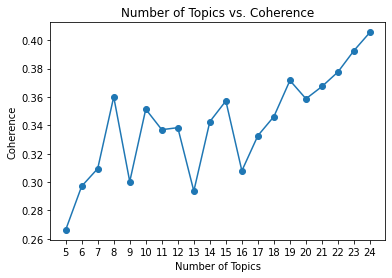

In [36]:
plt.plot(x_val,y_val)
plt.scatter(x_val,y_val)
plt.title('Number of Topics vs. Coherence')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence')
plt.xticks(x_val)
plt.show()


In [37]:
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix, num_topics=15, id2word = dictionary, passes=40,\
               iterations=200,  chunksize = 10000, eval_every = None, random_state=0)

In [38]:
Lda2 = gensim.models.ldamodel.LdaModel
ldamodel2 = Lda2(doc_term_matrix, num_topics=23, id2word = dictionary, passes=40,\
               iterations=200,  chunksize = 10000, eval_every = None, random_state=0)

In [39]:
ldamodel.show_topics(15, num_words=10, formatted=False)

[(0,
  [('week', 0.10049698),
   ('discuss', 0.037975088),
   ('see', 0.03411973),
   ('hear', 0.029876187),
   ('month', 0.029691253),
   ('education', 0.026816998),
   ('threat', 0.022809608),
   ('engineering', 0.02266014),
   ('field', 0.019993903),
   ('something', 0.019816143)]),
 (1,
  [('year', 0.1234249),
   ('life', 0.043238346),
   ('production', 0.039560337),
   ('role', 0.03890053),
   ('play', 0.02660049),
   ('collaboration', 0.025850594),
   ('automation', 0.025744904),
   ('setup', 0.0249266),
   ('visibility', 0.02461982),
   ('session', 0.024494164)]),
 (2,
  [('day', 0.11968296),
   ('safety', 0.06534113),
   ('Today', 0.057811428),
   ('software', 0.04579312),
   ('research', 0.033435453),
   ('news', 0.031380676),
   ('government', 0.025364563),
   ('para', 0.024428824),
   ('con', 0.023829002),
   ('let', 0.023769597)]),
 (3,
  [('look', 0.09220514),
   ('storage', 0.081807345),
   ('power', 0.057215266),
   ('report', 0.03510104),
   ('approach', 0.03478168),
  

In [40]:
topic_data =  pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary, mds = 'pcoa')
pyLDAvis.display(topic_data)

/opt/conda/lib/python3.7/site-packages/pyLDAvis/_prepare.py:248: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [41]:
all_topics = {}
num_terms = 10 # Adjust number of words to represent each topic
lambd = 0.6 # Adjust this accordingly based on tuning above
for i in range(1,16): #Adjust this to reflect number of topics chosen for final LDA model
    topic = topic_data.topic_info[topic_data.topic_info.Category == 'Topic'+str(i)].copy()
    topic['relevance'] = topic['loglift']*(1-lambd)+topic['logprob']*lambd
    all_topics['Topic '+str(i)] = topic.sort_values(by='relevance', ascending=False).Term[:num_terms].values

In [42]:
pd.DataFrame(all_topics).T

,0,1,2,3,4,5,6,7,8,9
Topic 1,team,help,message,experience,contact,customer,time,service,issue,home
Topic 2,industry,business,network,future,lea,sustainability,performance,get,value,family
Topic 3,security,today,cybersecurity,cloud,infrastructure,management,system,partnership,water,quality
Topic 4,support,work,amp,access,color,everyone,organization,protection,health,love
Topic 5,product,event,partner,series,line,market,podcast,cancer,proud,community
Topic 6,game,blog,sign,environment,impact,weekend,energy,mand,list,career
Topic 7,world,food,company,need,change,booth,building,success,everything,center
Topic 8,tomorrow,link,vice,que,conference,credit,form,phone,register,skin
Topic 9,day,safety,Today,software,research,news,government,para,con,let
Topic 10,solution,learn,webinar,case,project,manufacturing,opportunity,check,office,chance


In [43]:
ldamodel2.show_topics(23, num_words=10, formatted=False)

[(0,
  [('blog', 0.08973576),
   ('infrastructure', 0.083227344),
   ('discuss', 0.047900174),
   ('protection', 0.047209043),
   ('hear', 0.03768439),
   ('month', 0.03745098),
   ('list', 0.036920764),
   ('post', 0.031652812),
   ('equipment', 0.03026622),
   ('plan', 0.021896942)]),
 (1,
  [('security', 0.34463334),
   ('risk', 0.03627303),
   ('para', 0.032997437),
   ('meet', 0.032551594),
   ('capacity', 0.031288374),
   ('credit', 0.025696706),
   ('face', 0.022143532),
   ('key', 0.01934506),
   ('card', 0.017222779),
   ('talent', 0.01718991)]),
 (2,
  [('day', 0.12302909),
   ('network', 0.11451684),
   ('customer', 0.095238335),
   ('service', 0.08224694),
   ('Today', 0.059427205),
   ('care', 0.03402405),
   ('chance', 0.03067718),
   ('glass', 0.02058329),
   ('goal', 0.019315276),
   ('appreciate', 0.017485261)]),
 (3,
  [('power', 0.1068127),
   ('location', 0.048673697),
   ('vice', 0.0421446),
   ('level', 0.041458398),
   ('increase', 0.039065287),
   ('threat', 0.0

In [44]:
topic_data =  pyLDAvis.gensim.prepare(ldamodel2, doc_term_matrix, dictionary, mds = 'pcoa')
pyLDAvis.display(topic_data)

/opt/conda/lib/python3.7/site-packages/pyLDAvis/_prepare.py:248: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [45]:
all_topics = {}
num_terms = 10 # Adjust number of words to represent each topic
lambd = 0.6 # Adjust this accordingly based on tuning above
for i in range(1,24): #Adjust this to reflect number of topics chosen for final LDA model
    topic = topic_data.topic_info[topic_data.topic_info.Category == 'Topic'+str(i)].copy()
    topic['relevance'] = topic['loglift']*(1-lambd)+topic['logprob']*lambd
    all_topics['Topic '+str(i)] = topic.sort_values(by='relevance', ascending=False).Term[:num_terms].values

In [46]:
pd.DataFrame(all_topics).T

,0,1,2,3,4,5,6,7,8,9
Topic 1,team,world,contact,assist,issue,join,education,booth,career,create
Topic 2,time,business,work,industry,home,lea,environment,food,get,change
Topic 3,support,safety,community,software,organization,report,need,health,everything,space
Topic 4,today,sign,role,series,weekend,check,tech,play,talk,government
Topic 5,amp,year,solution,week,journey,visibility,assistance,info,thing,investment
Topic 6,look,performance,product,storage,use,secure,tomorrow,packaging,conference,cost
Topic 7,day,network,customer,service,Today,chance,care,glass,goal,appreciate
Topic 8,help,announce,platform,proud,area,foundation,phone,end,region,launch
Topic 9,message,please,partner,line,podcast,que,name,episo,cash,mind
Topic 10,experience,share,sustainability,drive,story,sorry,success,transformation,presentation,morning
